In [1]:
min=15
print(str(min)+'min')
lag=30
formato='%Y-%m-%d %H:%M:%S'

15min


In [2]:
import codigo
from codigo import utils
from codigo import model_utils

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

# Importar Dataset depurado

In [4]:
df_Inicial = pd.read_csv(r'dataset/generado/datasetDepurado.csv')

# Revisamos las columnas que contiene el Dataset

In [5]:
df_Inicial.head()

ID                 Date  Glucose level
0  LIB193263  2020-06-09 19:08:00           99.0
1  LIB193263  2020-06-09 19:23:00           92.0
2  LIB193263  2020-06-09 19:38:00           86.0
3  LIB193263  2020-06-09 19:53:00           85.0
4  LIB193263  2020-06-09 20:08:00           85.0

In [6]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             object 
 1   Date           object 
 2   Glucose level  float64
dtypes: float64(1), object(2)
memory usage: 67.9+ MB


### Cambiamos el formato de la columna Date de object a datetime64

In [7]:
df_Inicial['Date']=pd.to_datetime(df_Inicial['Date'])

In [8]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966685 entries, 0 to 2966684
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 67.9+ MB


In [9]:
df_Inicial['Date'].min()

Timestamp('2018-01-06 00:31:00')

In [10]:
df_Inicial['Date'].max()

Timestamp('2022-03-20 23:58:00')

In [11]:
df=df_Inicial

In [12]:
features=['Glucose level','hour','min','pod_id','level_id']

In [13]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))
train_share = 0
val_share = 0 
n_ahead=1

# Generación de Dataset General

In [14]:
dfIDPacientesTest = pd.read_csv(r'dataset/generado/IDs_Test.csv')
dfIDPacientesTest

ID
0   LIB193358
1   LIB193317
2   LIB193271
3   LIB193392
4   LIB193353
5   LIB193274
6   LIB193378
7   LIB193330
8   LIB193325
9   LIB193376
10  LIB193344
11  LIB193284
12  LIB193326
13  LIB193379
14  LIB193345
15  LIB193370
16  LIB193375
17  LIB193338
18  LIB193393
19  LIB193343
20  LIB193331
21  LIB193363
22  LIB193303
23  LIB193337
24  LIB193357
25  LIB193352
26  LIB193387
27  LIB193369
28  LIB193275
29  LIB193279
30  LIB193281
31  LIB193278
32  LIB193328
33  LIB193272
34  LIB193319
35  LIB193377
36  LIB193396
37  LIB193381
38  LIB193399
39  LIB193306
40  LIB193276
41  LIB193282
42  LIB193366
43  LIB193398
44  LIB193283
45  LIB193365
46  LIB193321

In [15]:
dfCopy = df.copy()
dfGen=pd.DataFrame()
strMin=str(min)+'min'
for pacienteID in dfIDPacientesTest['ID']: 
    data=utils.getDataPatient(dfCopy,pacienteID,strMin,True,True)
    data['level_label'] = data['Glucose level'].apply(utils.label_LevelBG) 
    if(len(data['Glucose level'])>=lag):
        dfGen = pd.concat([dfGen, data])

In [16]:
dfGen

Glucose level         ID                Date  \
Date                                                                
2021-02-05 11:45:00          211.0  LIB193358 2021-02-05 11:45:00   
2021-02-05 12:00:00          218.0  LIB193358 2021-02-05 12:00:00   
2021-02-05 12:15:00          220.0  LIB193358 2021-02-05 12:15:00   
2021-02-05 12:30:00          231.0  LIB193358 2021-02-05 12:30:00   
2021-02-05 12:45:00          246.0  LIB193358 2021-02-05 12:45:00   
...                            ...        ...                 ...   
2022-02-17 08:15:00          137.0  LIB193365 2022-02-17 08:15:00   
2022-02-17 08:30:00          177.0  LIB193365 2022-02-17 08:30:00   
2022-02-17 08:45:00          198.0  LIB193365 2022-02-17 08:45:00   
2022-02-17 09:00:00          216.0  LIB193365 2022-02-17 09:00:00   
2022-02-17 09:15:00          233.0  LIB193365 2022-02-17 09:15:00   

                       level_label  
Date                                
2021-02-05 11:45:00  hyperglycemia  
2021-02-05 12:00:00  hyperglycemia  
2021-02-05 12:15:00  hyperglycemia  
2021-02-05 12:30:00  hyperglycemia  
2021-02-05 12:45:00  hyperglycemia  
...                            ...  
2022-02-17 08:15:00         normal  
2022-02-17 08:30:00         normal  
2022-02-17 08:45:00  hyperglycemia  
2022-02-17 09:00:00  hyperglycemia  
2022-02-17 09:15:00  hyperglycemia  

[478281 rows x 4 columns]

In [17]:
dfGen['Glucose level'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 478281 entries, 2021-02-05 11:45:00 to 2022-02-17 09:15:00
Series name: Glucose level
Non-Null Count   Dtype  
--------------   -----  
297626 non-null  float64
dtypes: float64(1)
memory usage: 7.3 MB


In [18]:
dfGen=dfGen.dropna()
dfGen['Glucose level'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 297626 entries, 2021-02-05 11:45:00 to 2022-02-17 09:15:00
Series name: Glucose level
Non-Null Count   Dtype  
--------------   -----  
297626 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB


In [19]:
dfPacienteCount= pd.DataFrame(dfGen.ID.value_counts().sort_values(ascending=False))
dfPacienteCount

ID
LIB193358  15136
LIB193317  14865
LIB193271  14853
LIB193392  13607
LIB193353  13079
LIB193274  11792
LIB193330  11285
LIB193325  11144
LIB193376  10671
LIB193344  10343
LIB193284  10291
LIB193326  10291
LIB193379   9664
LIB193378   9045
LIB193345   8890
LIB193370   8471
LIB193375   8309
LIB193338   8047
LIB193393   7107
LIB193343   6300
LIB193331   6024
LIB193363   5357
LIB193303   5282
LIB193337   5187
LIB193357   5164
LIB193352   4771
LIB193387   4384
LIB193369   4170
LIB193275   4093
LIB193279   3673
LIB193281   3590
LIB193278   3514
LIB193328   3474
LIB193272   3435
LIB193319   3027
LIB193377   2622
LIB193396   2383
LIB193381   2083
LIB193399   1913
LIB193306   1901
LIB193276   1898
LIB193282   1802
LIB193366   1287
LIB193398   1249
LIB193283   1098
LIB193365   1055

<AxesSubplot:ylabel='level_label'>

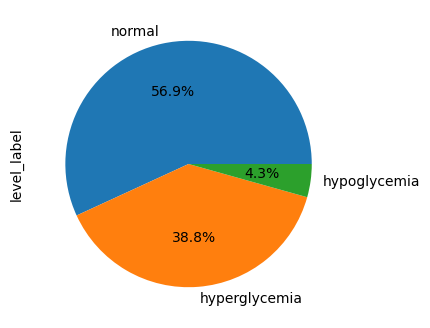

In [20]:
dfGen['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

## Análisis del Paciente 1: ID: LIB193399 

Contiene 1913, se considera que contiene pocos registros

In [21]:
ID_Paciente=ID_Paciente1='LIB193399'
diasP1=[]
especialesP1=[]

In [22]:
dfGen[dfGen['ID'] == ID_Paciente]

Glucose level         ID                Date  \
Date                                                                
2020-09-30 18:15:00          105.0  LIB193399 2020-09-30 18:15:00   
2020-09-30 18:30:00          101.0  LIB193399 2020-09-30 18:30:00   
2020-09-30 18:45:00           98.0  LIB193399 2020-09-30 18:45:00   
2020-09-30 19:00:00           99.0  LIB193399 2020-09-30 19:00:00   
2020-09-30 19:15:00          108.0  LIB193399 2020-09-30 19:15:00   
...                            ...        ...                 ...   
2020-10-20 20:45:00           83.0  LIB193399 2020-10-20 20:45:00   
2020-10-20 21:00:00           76.0  LIB193399 2020-10-20 21:00:00   
2020-10-20 21:15:00           67.0  LIB193399 2020-10-20 21:15:00   
2020-10-20 21:30:00           63.0  LIB193399 2020-10-20 21:30:00   
2020-10-20 21:45:00           63.0  LIB193399 2020-10-20 21:45:00   

                      level_label  
Date                               
2020-09-30 18:15:00        normal  
2020-09-30 18:30:00        normal  
2020-09-30 18:45:00        normal  
2020-09-30 19:00:00        normal  
2020-09-30 19:15:00        normal  
...                           ...  
2020-10-20 20:45:00        normal  
2020-10-20 21:00:00        normal  
2020-10-20 21:15:00  hypoglycemia  
2020-10-20 21:30:00  hypoglycemia  
2020-10-20 21:45:00  hypoglycemia  

[1913 rows x 4 columns]

<AxesSubplot:ylabel='level_label'>

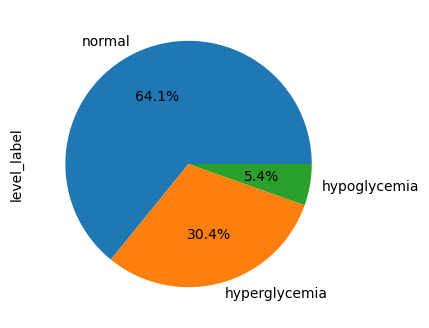

In [23]:
dfGen[dfGen['ID'] == ID_Paciente]['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

### Selección del Dia 1 del Paciente 1: ID: LIB193399

Fecha Inicio Previo  : 2020-09-30 20:30:00
Rango Inicio Objetivo: 2020-10-1 04:00:00
Rango Fin Objetivo   : 2020-10-1 23:59:59
Cantidad de pacientes y eventos de ese dia
LIB193399    110
LIB193271     95
LIB193275     89
Name: ID, dtype: int64


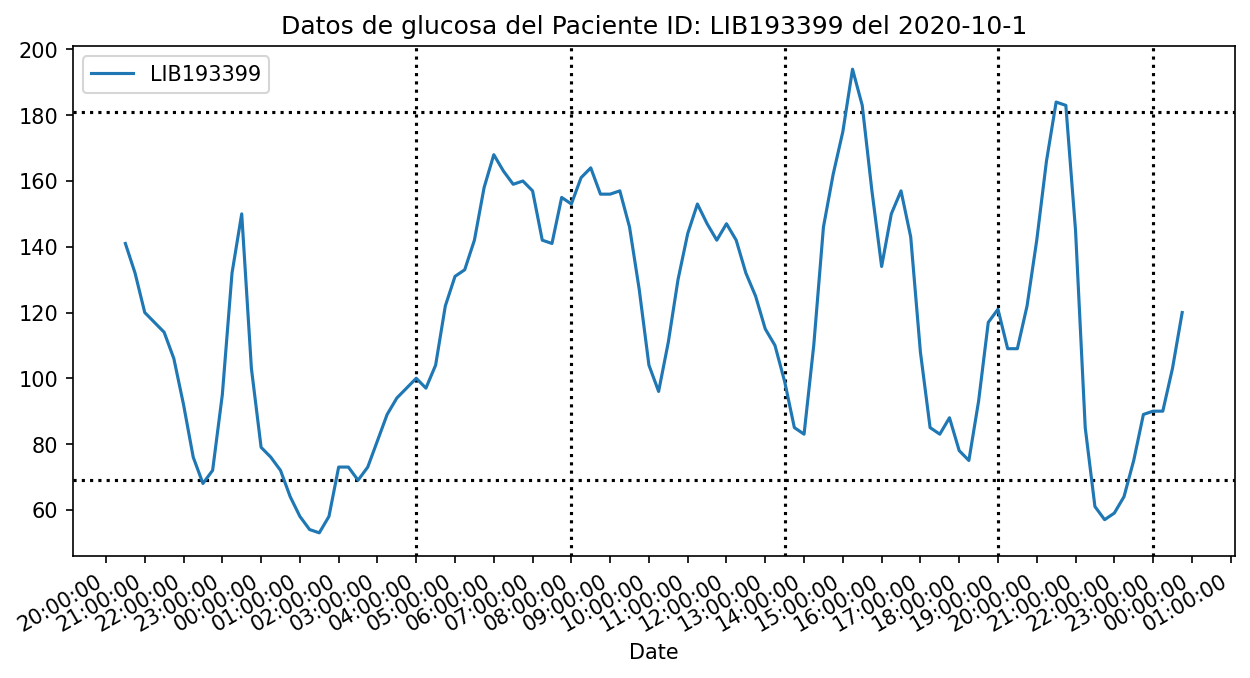

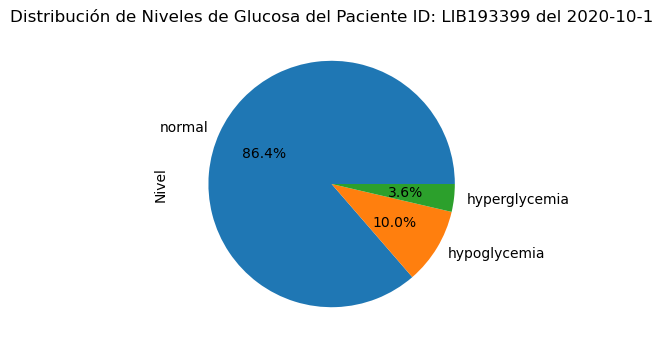

In [24]:
dateObj='2020-10-1'
diasP1.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGen.loc[DateObjStart:ObjRangeDateEnd]
print('Cantidad de pacientes y eventos de ese dia')
print(df_rango['ID'].value_counts())


array_ID_Paciente=[ID_Paciente]

dfPaciente=utils.genDataset(df_rango,array_ID_Paciente,min,True,True)  
utils.plotDayAllPatients(dfPaciente,array_ID_Paciente,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()
dfP1_d1=dfPaciente

### Agregamos eventos especiales de hipoglucemia

Siempre selecciono el 1er evento hipoglucemia que ocurre justo en el cambio

In [25]:
dfPaciente.loc[dateObj+' 21:00:00':dateObj+' 22:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-10-01 21:00:00          145.0  LIB193399 2020-10-01 21:00:00   
2020-10-01 21:15:00           85.0  LIB193399 2020-10-01 21:15:00   
2020-10-01 21:30:00           61.0  LIB193399 2020-10-01 21:30:00   
2020-10-01 21:45:00           57.0  LIB193399 2020-10-01 21:45:00   
2020-10-01 22:00:00           59.0  LIB193399 2020-10-01 22:00:00   

                            Nivel  
Date                               
2020-10-01 21:00:00        normal  
2020-10-01 21:15:00        normal  
2020-10-01 21:30:00  hypoglycemia  
2020-10-01 21:45:00  hypoglycemia  
2020-10-01 22:00:00  hypoglycemia

In [26]:
especialesP1.append('2020-10-01 21:30:00')

### Selección del Dia 2 del Paciente 1: ID: LIB193399

Fecha Inicio Previo  : 2020-10-02 20:30:00
Rango Inicio Objetivo: 2020-10-3 04:00:00
Rango Fin Objetivo   : 2020-10-3 23:59:59
Cantidad de pacientes y eventos de ese dia
LIB193399    110
LIB193271    104
Name: ID, dtype: int64


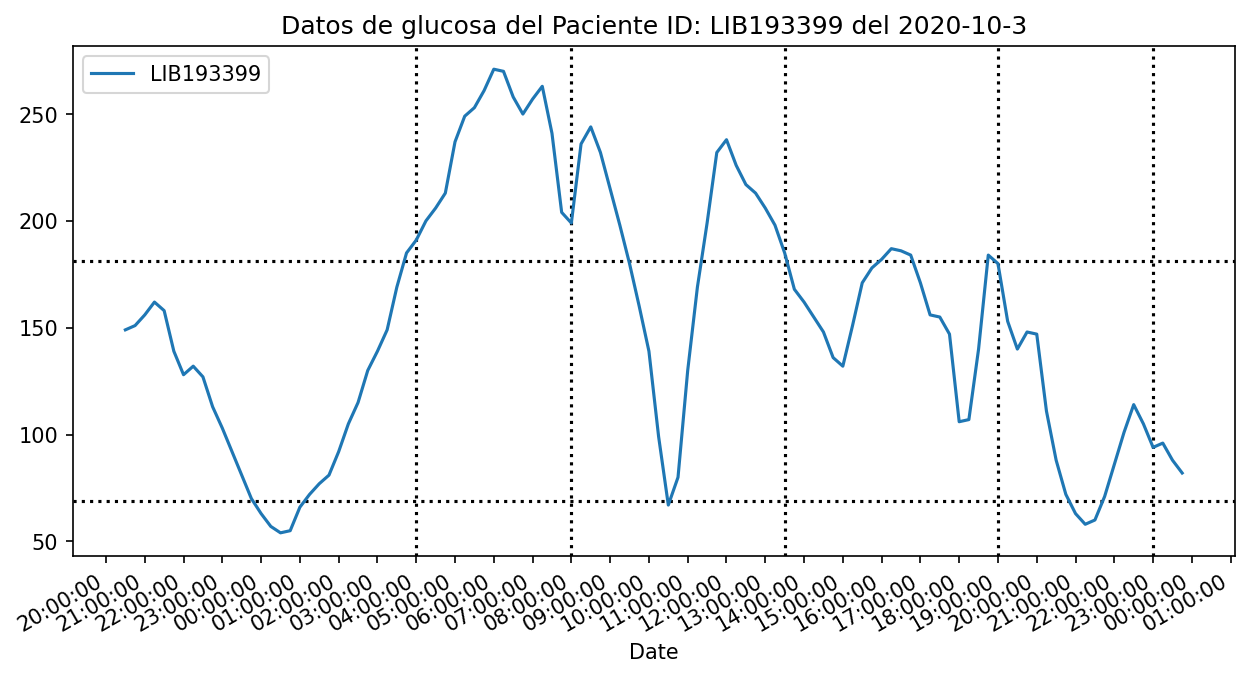

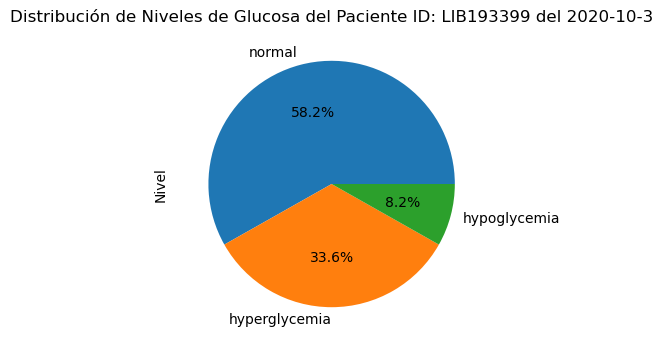

In [27]:
dateObj='2020-10-3'
diasP1.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGen.loc[DateObjStart:ObjRangeDateEnd]
print('Cantidad de pacientes y eventos de ese dia')
print(df_rango['ID'].value_counts())


array_ID_Paciente=[ID_Paciente]

dfPaciente=utils.genDataset(df_rango,array_ID_Paciente,min,True,True)  
utils.plotDayAllPatients(dfPaciente,array_ID_Paciente,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()
dfP1_d2=dfPaciente

### Agregamos eventos especiales de hipoglucemia

In [28]:
dfPaciente.loc[dateObj+' 10:00:00':dateObj+' 11:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-10-03 10:00:00          139.0  LIB193399 2020-10-03 10:00:00   
2020-10-03 10:15:00           99.0  LIB193399 2020-10-03 10:15:00   
2020-10-03 10:30:00           67.0  LIB193399 2020-10-03 10:30:00   
2020-10-03 10:45:00           80.0  LIB193399 2020-10-03 10:45:00   
2020-10-03 11:00:00          130.0  LIB193399 2020-10-03 11:00:00   

                            Nivel  
Date                               
2020-10-03 10:00:00        normal  
2020-10-03 10:15:00        normal  
2020-10-03 10:30:00  hypoglycemia  
2020-10-03 10:45:00        normal  
2020-10-03 11:00:00        normal

In [29]:
especialesP1.append('2020-10-03 10:30:00')

In [30]:
dfPaciente.loc[dateObj+' 20:00:00':dateObj+' 21:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-10-03 20:00:00          147.0  LIB193399 2020-10-03 20:00:00   
2020-10-03 20:15:00          111.0  LIB193399 2020-10-03 20:15:00   
2020-10-03 20:30:00           88.0  LIB193399 2020-10-03 20:30:00   
2020-10-03 20:45:00           72.0  LIB193399 2020-10-03 20:45:00   
2020-10-03 21:00:00           63.0  LIB193399 2020-10-03 21:00:00   

                            Nivel  
Date                               
2020-10-03 20:00:00        normal  
2020-10-03 20:15:00        normal  
2020-10-03 20:30:00        normal  
2020-10-03 20:45:00        normal  
2020-10-03 21:00:00  hypoglycemia

In [31]:
especialesP1.append('2020-10-03 21:00:00')

### Selección del Dia 3 del Paciente 1: ID: LIB193399

Fecha Inicio Previo  : 2020-10-09 20:30:00
Rango Inicio Objetivo: 2020-10-10 04:00:00
Rango Fin Objetivo   : 2020-10-10 23:59:59
Cantidad de pacientes y eventos de ese dia
LIB193399    110
LIB193271    107
LIB193275    105
Name: ID, dtype: int64


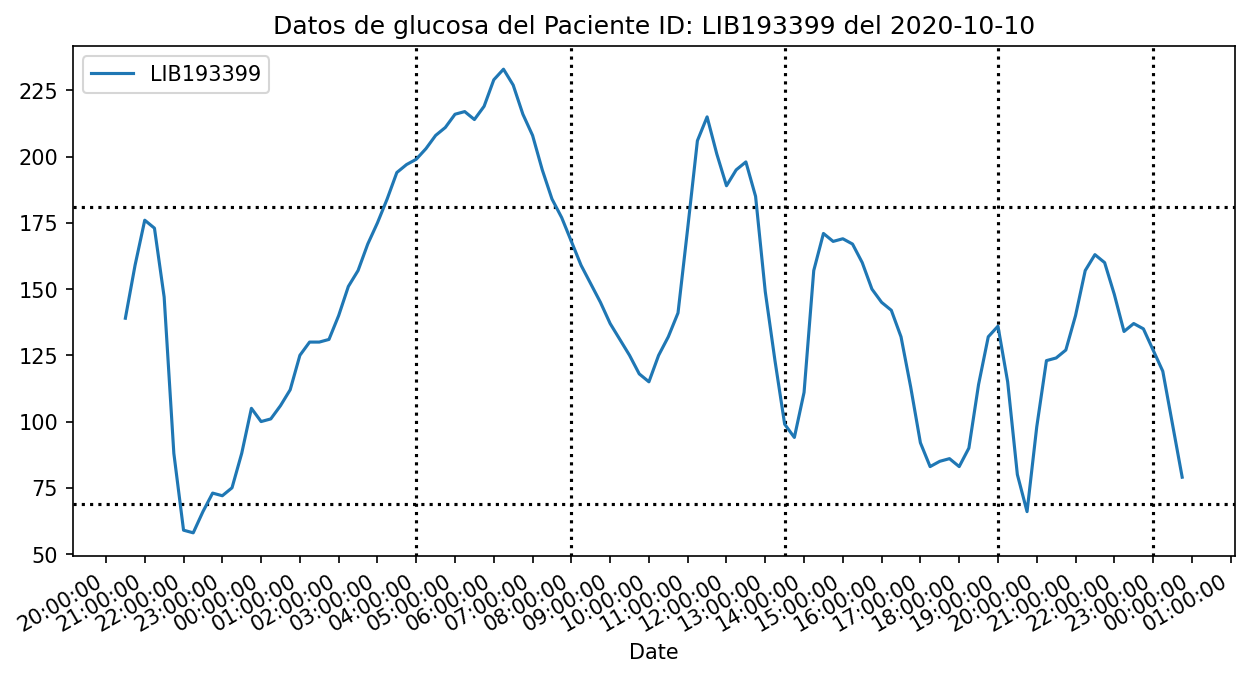

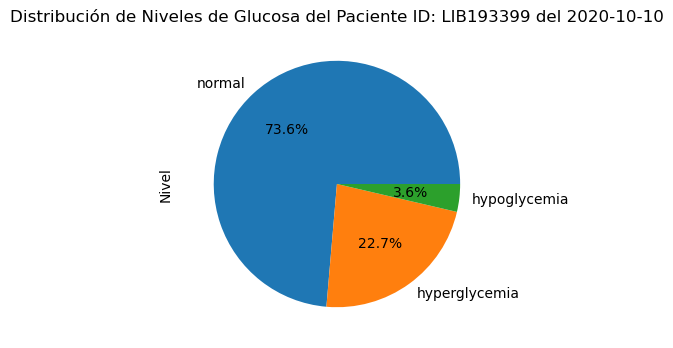

In [32]:
dateObj='2020-10-10'
diasP1.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGen.loc[DateObjStart:ObjRangeDateEnd]
print('Cantidad de pacientes y eventos de ese dia')
print(df_rango['ID'].value_counts())


array_ID_Paciente=[ID_Paciente]

dfPaciente=utils.genDataset(df_rango,array_ID_Paciente,min,True,True)  
utils.plotDayAllPatients(dfPaciente,array_ID_Paciente,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()
dfP1_d3=dfPaciente

### Agregamos eventos especiales de hipoglucemia

In [33]:
dfPaciente.loc[dateObj+' 19:00:00':dateObj+' 20:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-10-10 19:00:00          136.0  LIB193399 2020-10-10 19:00:00   
2020-10-10 19:15:00          115.0  LIB193399 2020-10-10 19:15:00   
2020-10-10 19:30:00           80.0  LIB193399 2020-10-10 19:30:00   
2020-10-10 19:45:00           66.0  LIB193399 2020-10-10 19:45:00   
2020-10-10 20:00:00           98.0  LIB193399 2020-10-10 20:00:00   

                            Nivel  
Date                               
2020-10-10 19:00:00        normal  
2020-10-10 19:15:00        normal  
2020-10-10 19:30:00        normal  
2020-10-10 19:45:00  hypoglycemia  
2020-10-10 20:00:00        normal

In [34]:
especialesP1.append('2020-10-10 19:45:00')

### Selección del Dia 4 del Paciente 1: ID: LIB193399

Fecha Inicio Previo  : 2020-10-11 20:30:00
Rango Inicio Objetivo: 2020-10-12 04:00:00
Rango Fin Objetivo   : 2020-10-12 23:59:59
Cantidad de pacientes y eventos de ese dia
LIB193399    110
LIB193271    109
LIB193275    104
Name: ID, dtype: int64


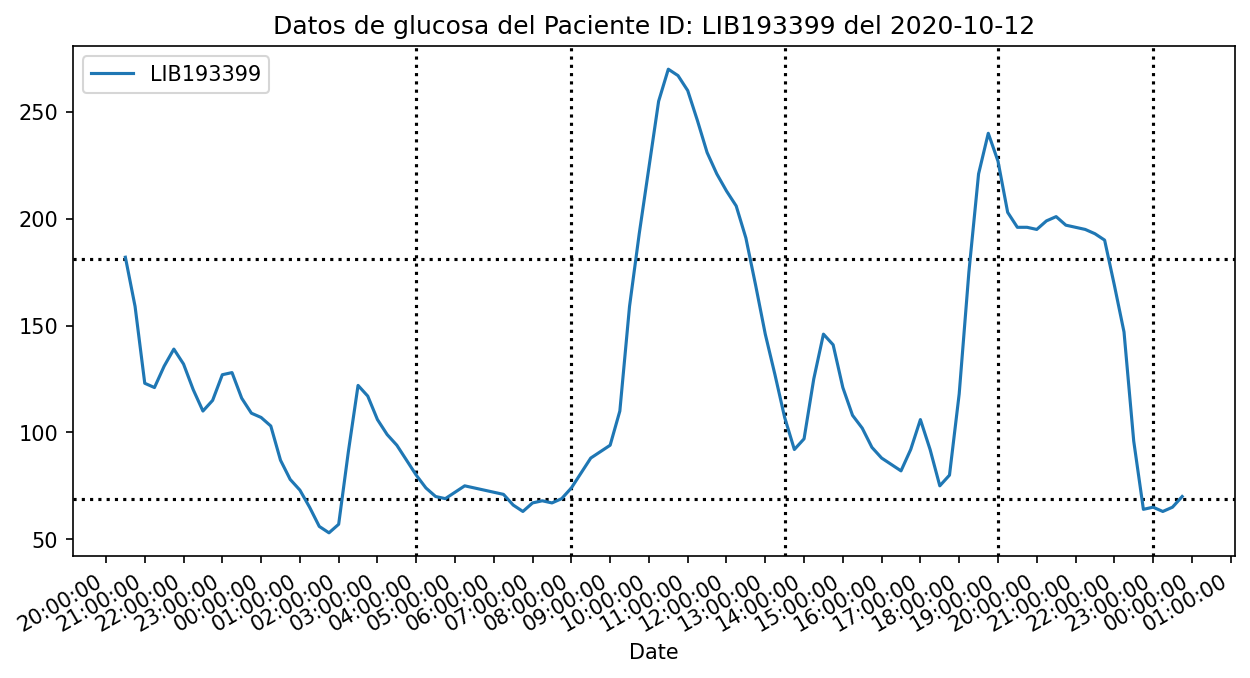

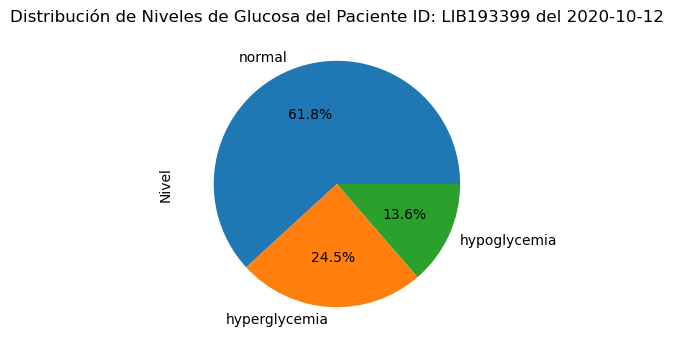

In [35]:
dateObj='2020-10-12'
diasP1.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGen.loc[DateObjStart:ObjRangeDateEnd]
print('Cantidad de pacientes y eventos de ese dia')
print(df_rango['ID'].value_counts())


array_ID_Paciente=[ID_Paciente]

dfPaciente=utils.genDataset(df_rango,array_ID_Paciente,min,True,True)  
utils.plotDayAllPatients(dfPaciente,array_ID_Paciente,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()
dfP1_d4=dfPaciente

### Agregamos eventos especiales de hipoglucemia

In [36]:
dfPaciente.loc[dateObj+' 06:00:00':dateObj+' 07:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-10-12 06:00:00           72.0  LIB193399 2020-10-12 06:00:00   
2020-10-12 06:15:00           71.0  LIB193399 2020-10-12 06:15:00   
2020-10-12 06:30:00           66.0  LIB193399 2020-10-12 06:30:00   
2020-10-12 06:45:00           63.0  LIB193399 2020-10-12 06:45:00   
2020-10-12 07:00:00           67.0  LIB193399 2020-10-12 07:00:00   

                            Nivel  
Date                               
2020-10-12 06:00:00        normal  
2020-10-12 06:15:00        normal  
2020-10-12 06:30:00  hypoglycemia  
2020-10-12 06:45:00  hypoglycemia  
2020-10-12 07:00:00  hypoglycemia

In [37]:
especialesP1.append('2020-10-12 06:30:00')

In [38]:
diasP1

['2020-10-1', '2020-10-3', '2020-10-10', '2020-10-12']

In [39]:
especialesP1

['2020-10-01 21:30:00',
 '2020-10-03 10:30:00',
 '2020-10-03 21:00:00',
 '2020-10-10 19:45:00',
 '2020-10-12 06:30:00']

## Análisis del Paciente 3: ID: LIB193271

Contiene 14853 registros, se considera que contiene bastantes registros 

In [40]:
ID_Paciente=ID_Paciente3='LIB193271'
diasP3=[]
especialesP3=[]

In [41]:
dfGen[dfGen['ID'] == ID_Paciente]

Glucose level         ID                Date level_label
Date                                                                         
2020-09-24 17:45:00          125.0  LIB193271 2020-09-24 17:45:00      normal
2020-09-24 18:00:00          109.0  LIB193271 2020-09-24 18:00:00      normal
2020-09-24 18:15:00          111.0  LIB193271 2020-09-24 18:15:00      normal
2020-09-24 18:30:00          119.0  LIB193271 2020-09-24 18:30:00      normal
2020-09-24 18:45:00          114.0  LIB193271 2020-09-24 18:45:00      normal
...                            ...        ...                 ...         ...
2022-03-20 22:45:00          172.0  LIB193271 2022-03-20 22:45:00      normal
2022-03-20 23:00:00          172.0  LIB193271 2022-03-20 23:00:00      normal
2022-03-20 23:15:00          179.0  LIB193271 2022-03-20 23:15:00      normal
2022-03-20 23:30:00          179.0  LIB193271 2022-03-20 23:30:00      normal
2022-03-20 23:45:00          172.0  LIB193271 2022-03-20 23:45:00      normal

[14853 rows x 4 columns]

<AxesSubplot:ylabel='level_label'>

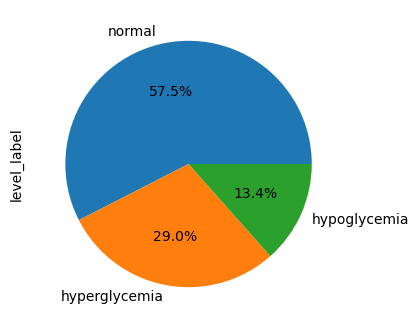

In [42]:
dfGen[dfGen['ID'] == ID_Paciente]['level_label'].value_counts().plot.pie(y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))

### Selección del Dia 1 del Paciente 3: ID: LIB193271

Fecha Inicio Previo  : 2020-09-28 20:30:00
Rango Inicio Objetivo: 2020-09-29 04:00:00
Rango Fin Objetivo   : 2020-09-29 23:59:59
Cantidad de pacientes y eventos de ese dia
LIB193271    110
LIB193275    109
Name: ID, dtype: int64


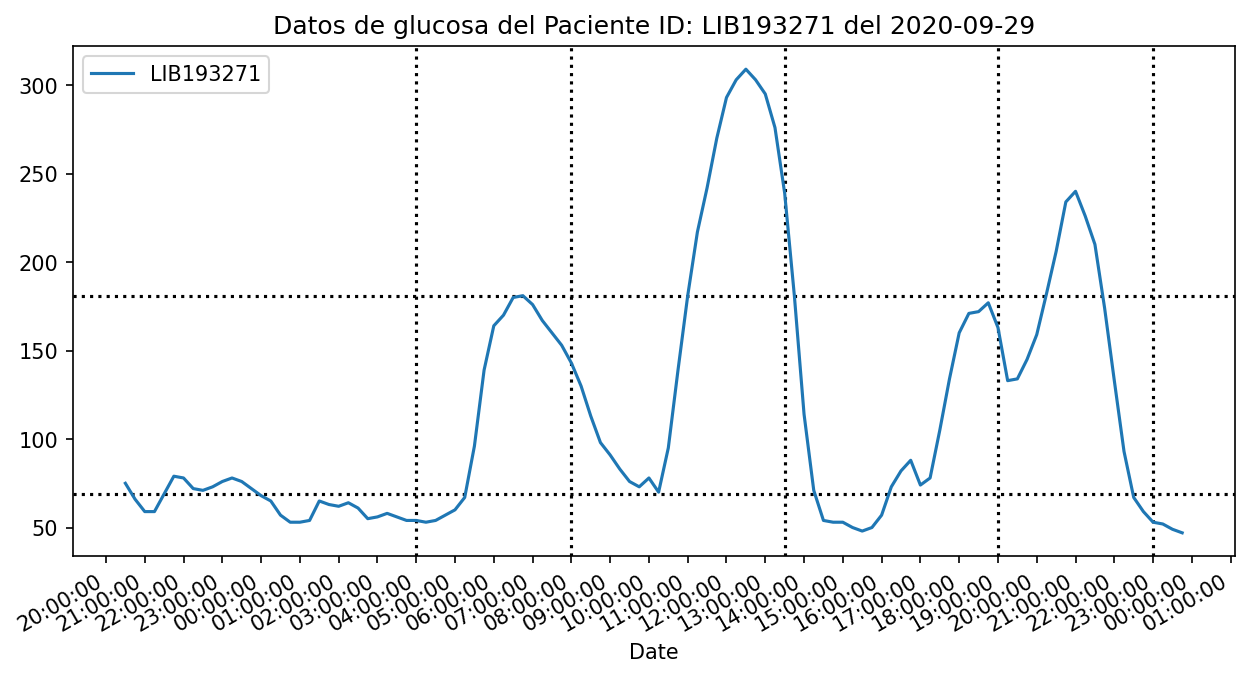

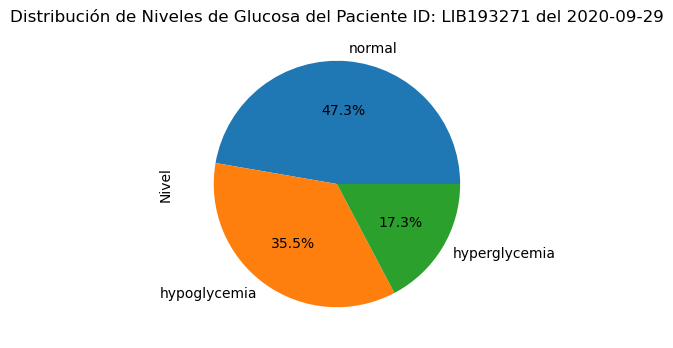

In [43]:
dateObj='2020-09-29'
diasP3.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGen.loc[DateObjStart:ObjRangeDateEnd]
print('Cantidad de pacientes y eventos de ese dia')
print(df_rango['ID'].value_counts())


array_ID_Paciente=[ID_Paciente]

dfPaciente=utils.genDataset(df_rango,array_ID_Paciente,min,True,True)  
utils.plotDayAllPatients(dfPaciente,array_ID_Paciente,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()
dfP3_d1=dfPaciente

### Agregamos eventos especiales de hipoglucemia

In [44]:
dfPaciente.loc[dateObj+' 14:00:00':dateObj+' 15:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-09-29 14:00:00          114.0  LIB193271 2020-09-29 14:00:00   
2020-09-29 14:15:00           71.0  LIB193271 2020-09-29 14:15:00   
2020-09-29 14:30:00           54.0  LIB193271 2020-09-29 14:30:00   
2020-09-29 14:45:00           53.0  LIB193271 2020-09-29 14:45:00   
2020-09-29 15:00:00           53.0  LIB193271 2020-09-29 15:00:00   

                            Nivel  
Date                               
2020-09-29 14:00:00        normal  
2020-09-29 14:15:00        normal  
2020-09-29 14:30:00  hypoglycemia  
2020-09-29 14:45:00  hypoglycemia  
2020-09-29 15:00:00  hypoglycemia

In [45]:
especialesP3.append('2020-09-29 14:30:00')

### Selección del Dia 2 del Paciente 3: ID: LIB193271

Fecha Inicio Previo  : 2020-10-10 20:30:00
Rango Inicio Objetivo: 2020-10-11 04:00:00
Rango Fin Objetivo   : 2020-10-11 23:59:59
Cantidad de pacientes y eventos de ese dia
LIB193271    110
LIB193399    108
LIB193275     97
Name: ID, dtype: int64


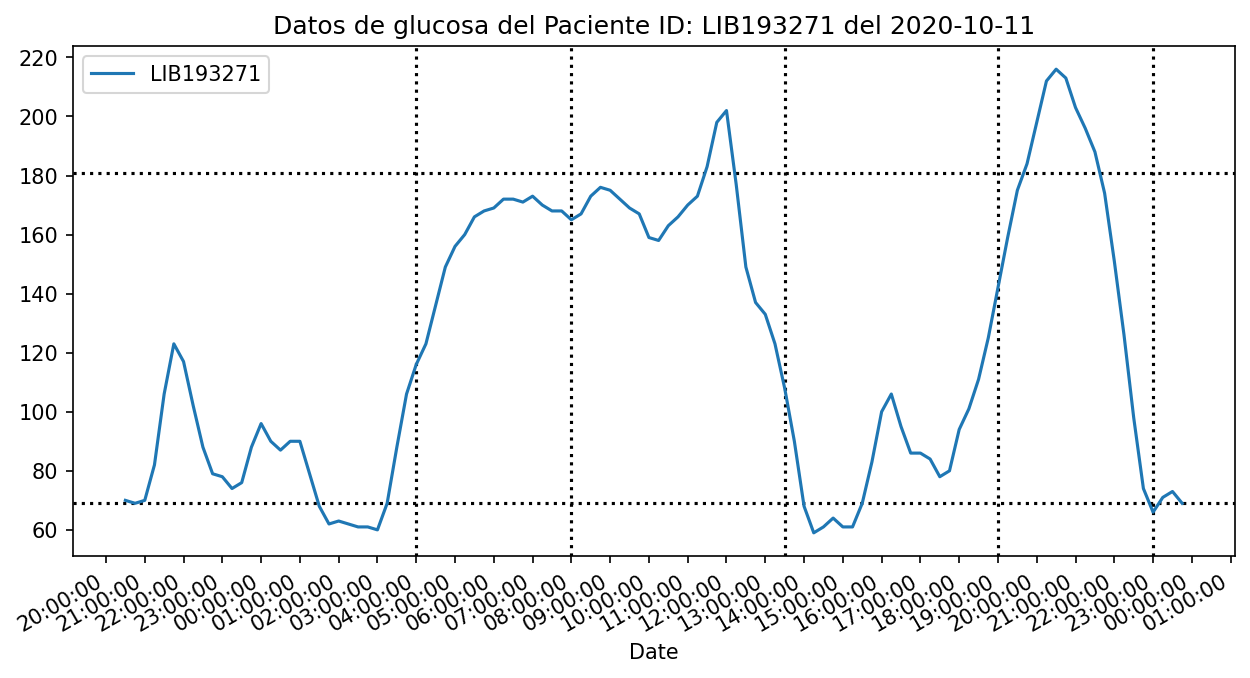

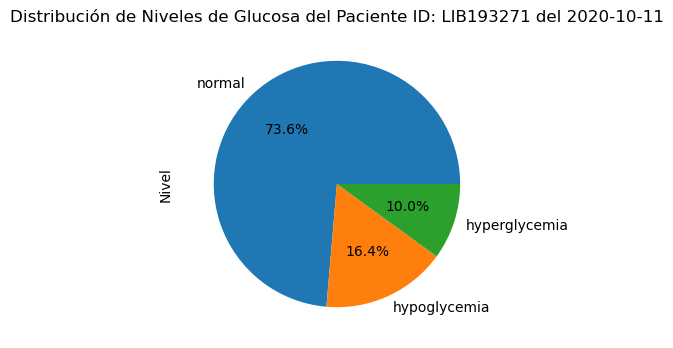

In [46]:
dateObj='2020-10-11'
diasP3.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGen.loc[DateObjStart:ObjRangeDateEnd]
print('Cantidad de pacientes y eventos de ese dia')
print(df_rango['ID'].value_counts())


array_ID_Paciente=[ID_Paciente]

dfPaciente=utils.genDataset(df_rango,array_ID_Paciente,min,True,True)  
utils.plotDayAllPatients(dfPaciente,array_ID_Paciente,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()
dfP3_d2=dfPaciente

### Agregamos eventos especiales de hipoglucemia

In [47]:
dfPaciente.loc[dateObj+' 13:00:00':dateObj+' 15:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-10-11 13:00:00          133.0  LIB193271 2020-10-11 13:00:00   
2020-10-11 13:15:00          123.0  LIB193271 2020-10-11 13:15:00   
2020-10-11 13:30:00          108.0  LIB193271 2020-10-11 13:30:00   
2020-10-11 13:45:00           90.0  LIB193271 2020-10-11 13:45:00   
2020-10-11 14:00:00           68.0  LIB193271 2020-10-11 14:00:00   
2020-10-11 14:15:00           59.0  LIB193271 2020-10-11 14:15:00   
2020-10-11 14:30:00           61.0  LIB193271 2020-10-11 14:30:00   
2020-10-11 14:45:00           64.0  LIB193271 2020-10-11 14:45:00   
2020-10-11 15:00:00           61.0  LIB193271 2020-10-11 15:00:00   

                            Nivel  
Date                               
2020-10-11 13:00:00        normal  
2020-10-11 13:15:00        normal  
2020-10-11 13:30:00        normal  
2020-10-11 13:45:00        normal  
2020-10-11 14:00:00  hypoglycemia  
2020-10-11 14:15:00  hypoglycemia  
2020-10-11 14:30:00  hypoglycemia  
2020-10-11 14:45:00  hypoglycemia  
2020-10-11 15:00:00  hypoglycemia

In [48]:
especialesP3.append('2020-10-11 14:00:00')

### Selección del Dia 3 del Paciente 3: ID: LIB193271

Fecha Inicio Previo  : 2020-10-12 20:30:00
Rango Inicio Objetivo: 2020-10-13 04:00:00
Rango Fin Objetivo   : 2020-10-13 23:59:59
Cantidad de pacientes y eventos de ese dia
LIB193271    110
LIB193275    109
LIB193399    109
Name: ID, dtype: int64


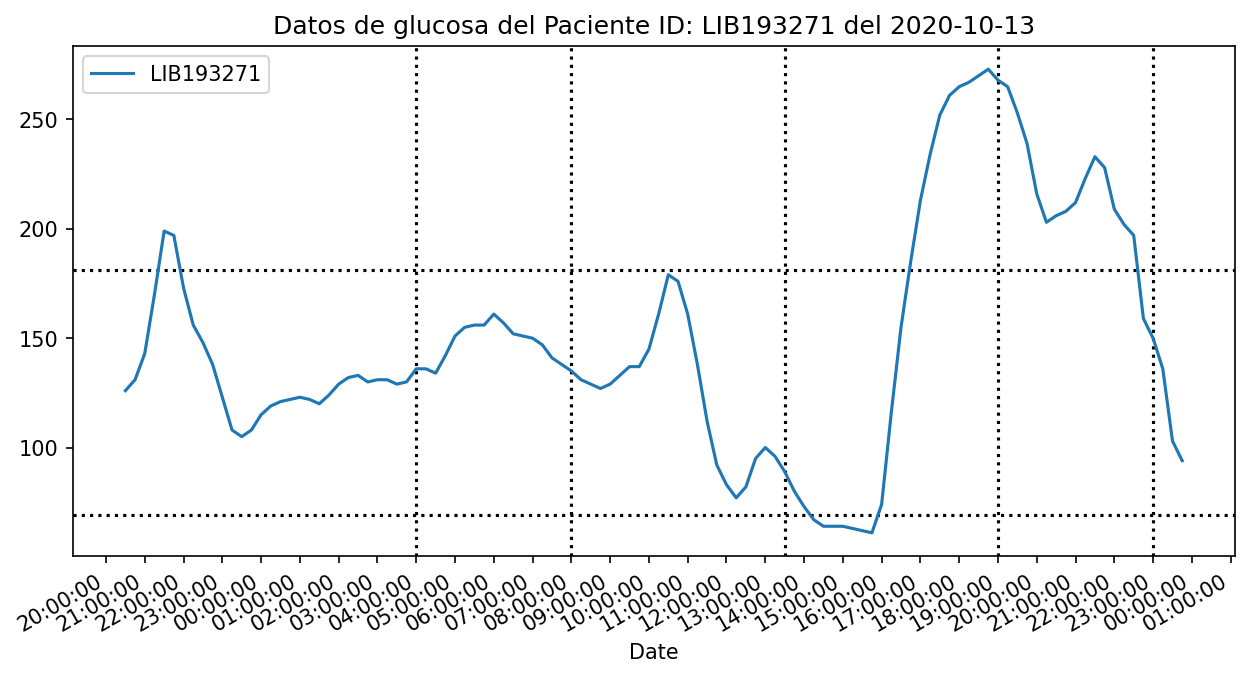

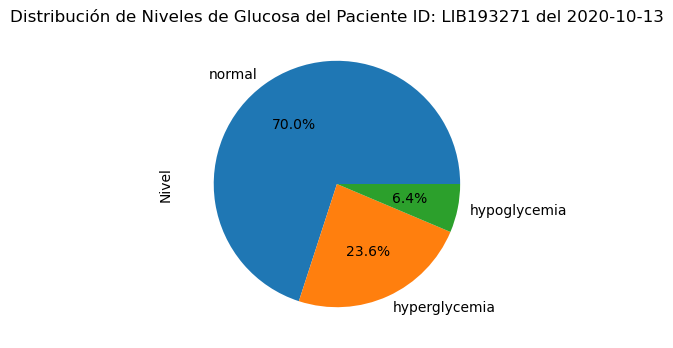

In [49]:
dateObj='2020-10-13'
diasP3.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGen.loc[DateObjStart:ObjRangeDateEnd]
print('Cantidad de pacientes y eventos de ese dia')
print(df_rango['ID'].value_counts())


array_ID_Paciente=[ID_Paciente]

dfPaciente=utils.genDataset(df_rango,array_ID_Paciente,min,True,True)  
utils.plotDayAllPatients(dfPaciente,array_ID_Paciente,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()
dfP3_d3=dfPaciente

### Agregamos eventos especiales de hipoglucemia

In [50]:
dfPaciente.loc[dateObj+' 14:00:00':dateObj+' 15:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-10-13 14:00:00           73.0  LIB193271 2020-10-13 14:00:00   
2020-10-13 14:15:00           67.0  LIB193271 2020-10-13 14:15:00   
2020-10-13 14:30:00           64.0  LIB193271 2020-10-13 14:30:00   
2020-10-13 14:45:00           64.0  LIB193271 2020-10-13 14:45:00   
2020-10-13 15:00:00           64.0  LIB193271 2020-10-13 15:00:00   

                            Nivel  
Date                               
2020-10-13 14:00:00        normal  
2020-10-13 14:15:00  hypoglycemia  
2020-10-13 14:30:00  hypoglycemia  
2020-10-13 14:45:00  hypoglycemia  
2020-10-13 15:00:00  hypoglycemia

In [51]:
especialesP3.append('2020-10-13 14:15:00')

### Selección del Dia 4 del Paciente 3: ID: LIB193271

Fecha Inicio Previo  : 2020-10-13 20:30:00
Rango Inicio Objetivo: 2020-10-14 04:00:00
Rango Fin Objetivo   : 2020-10-14 23:59:59
Cantidad de pacientes y eventos de ese dia
LIB193271    110
LIB193275    106
LIB193399    100
Name: ID, dtype: int64


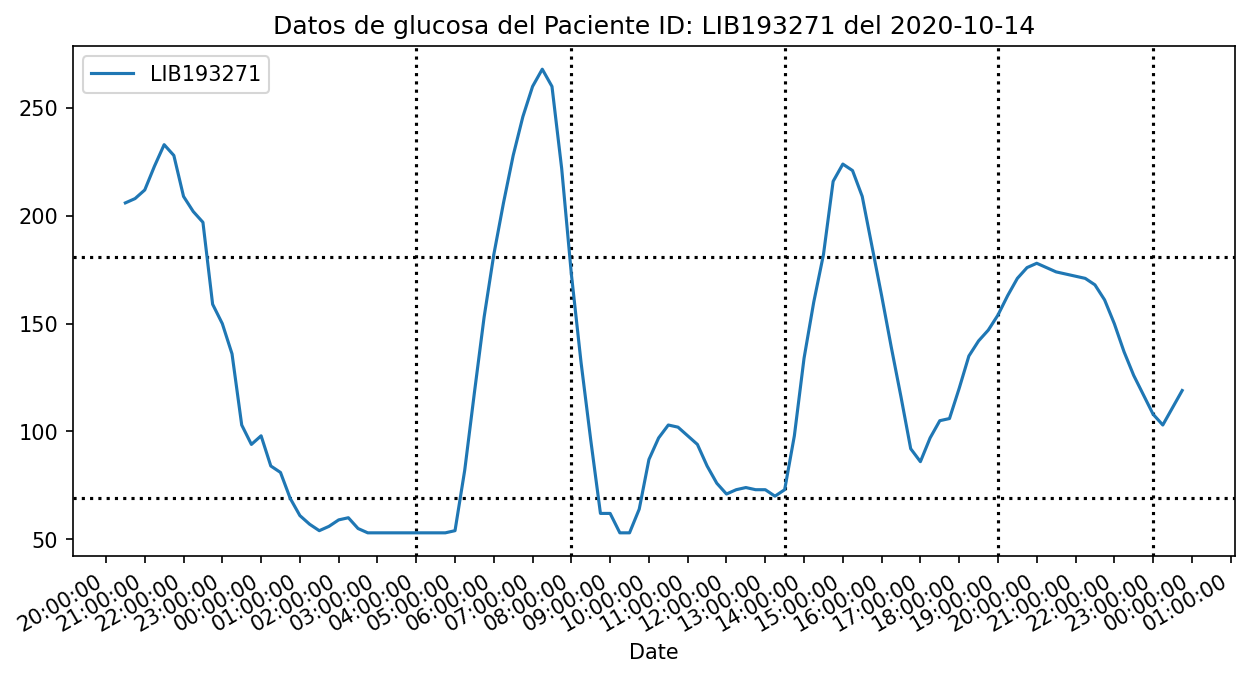

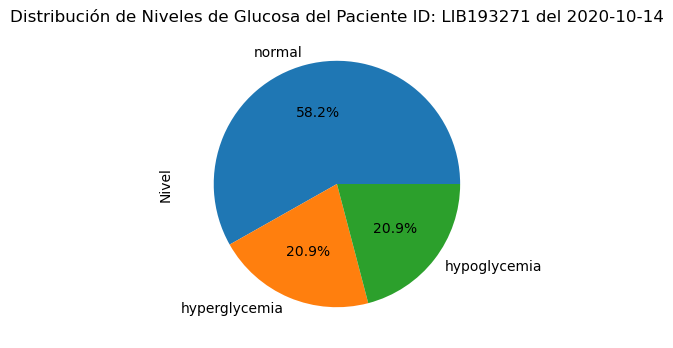

In [52]:
dateObj='2020-10-14'
diasP3.append(dateObj)
    
ObjRangeDateStart=dateObj+' 04:00:00';
ObjRangeDateEnd=dateObj+' 23:59:59';
DateObjStart=utils.restarMinutos(ObjRangeDateStart,formato,min*lag)
print('Fecha Inicio Previo  :',DateObjStart)
print('Rango Inicio Objetivo:',ObjRangeDateStart)
print('Rango Fin Objetivo   :',ObjRangeDateEnd)
df_rango=dfGen.loc[DateObjStart:ObjRangeDateEnd]
print('Cantidad de pacientes y eventos de ese dia')
print(df_rango['ID'].value_counts())


array_ID_Paciente=[ID_Paciente]

dfPaciente=utils.genDataset(df_rango,array_ID_Paciente,min,True,True)  
utils.plotDayAllPatients(dfPaciente,array_ID_Paciente,'Datos de glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,plt,dateObj)

dfPaciente['Nivel'] = dfPaciente['Glucose level'].apply(utils.label_LevelBG) 
dfPaciente['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa del Paciente ID: '+ID_Paciente +' del '+dateObj,y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()
dfP3_d4=dfPaciente

### Agregamos eventos especiales de hipoglucemia

In [53]:
dfPaciente.loc[dateObj+' 08:00:00':dateObj+' 09:00:00']

Glucose level         ID                Date  \
Date                                                                
2020-10-14 08:00:00          173.0  LIB193271 2020-10-14 08:00:00   
2020-10-14 08:15:00          132.0  LIB193271 2020-10-14 08:15:00   
2020-10-14 08:30:00           96.0  LIB193271 2020-10-14 08:30:00   
2020-10-14 08:45:00           62.0  LIB193271 2020-10-14 08:45:00   
2020-10-14 09:00:00           62.0  LIB193271 2020-10-14 09:00:00   

                            Nivel  
Date                               
2020-10-14 08:00:00        normal  
2020-10-14 08:15:00        normal  
2020-10-14 08:30:00        normal  
2020-10-14 08:45:00  hypoglycemia  
2020-10-14 09:00:00  hypoglycemia

In [54]:
especialesP3.append('2020-10-14 08:45:00')

In [55]:
diasP3

['2020-09-29', '2020-10-11', '2020-10-13', '2020-10-14']

In [56]:
especialesP3

['2020-09-29 14:30:00',
 '2020-10-11 14:00:00',
 '2020-10-13 14:15:00',
 '2020-10-14 08:45:00']

## Unimos los dataset de los 4 dias seleccionados de cada paciente

In [57]:
dfP1 = pd.concat([dfP1_d1,dfP1_d2,dfP1_d3,dfP1_d4])
#dfP2 = pd.concat([dfP2_d1,dfP2_d2,dfP2_d3,dfP2_d4])
dfP3 = pd.concat([dfP3_d1,dfP3_d2,dfP3_d3,dfP3_d4])

# Generación de dataset de eventos para pruebas

In [58]:
gen_X=np.reshape([], (0, lag, len(features)))
gen_Y=np.reshape([], (0,1))

## Prueba de recolección de los valores a predecir a las 4am

Hay que recordar que solo necesitamos 30 muestras hacia atras del objetivo, es decir 30*15min=450min o 7.5 horas antes

In [59]:
hora=' 04:00:00'
DateObj=diasP1[0]+hora
print(DateObj)
DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
print(DateObjStart)
df_rango=dfP1.loc[DateObjStart:DateObj]
print(len(df_rango[df_rango['ID'] == ID_Paciente1]))

2020-10-1 04:00:00
2020-09-30 20:30:00
31


## Probamos como se ven los datos del paciente

In [60]:
df_rango[df_rango['ID'] == ID_Paciente1]

Glucose level         ID                Date  \
Date                                                                
2020-09-30 20:30:00          141.0  LIB193399 2020-09-30 20:30:00   
2020-09-30 20:45:00          132.0  LIB193399 2020-09-30 20:45:00   
2020-09-30 21:00:00          120.0  LIB193399 2020-09-30 21:00:00   
2020-09-30 21:15:00          117.0  LIB193399 2020-09-30 21:15:00   
2020-09-30 21:30:00          114.0  LIB193399 2020-09-30 21:30:00   
2020-09-30 21:45:00          106.0  LIB193399 2020-09-30 21:45:00   
2020-09-30 22:00:00           92.0  LIB193399 2020-09-30 22:00:00   
2020-09-30 22:15:00           76.0  LIB193399 2020-09-30 22:15:00   
2020-09-30 22:30:00           68.0  LIB193399 2020-09-30 22:30:00   
2020-09-30 22:45:00           72.0  LIB193399 2020-09-30 22:45:00   
2020-09-30 23:00:00           95.0  LIB193399 2020-09-30 23:00:00   
2020-09-30 23:15:00          132.0  LIB193399 2020-09-30 23:15:00   
2020-09-30 23:30:00          150.0  LIB193399 2020-09-30 23:30:00   
2020-09-30 23:45:00          103.0  LIB193399 2020-09-30 23:45:00   
2020-10-01 00:00:00           79.0  LIB193399 2020-10-01 00:00:00   
2020-10-01 00:15:00           76.0  LIB193399 2020-10-01 00:15:00   
2020-10-01 00:30:00           72.0  LIB193399 2020-10-01 00:30:00   
2020-10-01 00:45:00           64.0  LIB193399 2020-10-01 00:45:00   
2020-10-01 01:00:00           58.0  LIB193399 2020-10-01 01:00:00   
2020-10-01 01:15:00           54.0  LIB193399 2020-10-01 01:15:00   
2020-10-01 01:30:00           53.0  LIB193399 2020-10-01 01:30:00   
2020-10-01 01:45:00           58.0  LIB193399 2020-10-01 01:45:00   
2020-10-01 02:00:00           73.0  LIB193399 2020-10-01 02:00:00   
2020-10-01 02:15:00           73.0  LIB193399 2020-10-01 02:15:00   
2020-10-01 02:30:00           69.0  LIB193399 2020-10-01 02:30:00   
2020-10-01 02:45:00           73.0  LIB193399 2020-10-01 02:45:00   
2020-10-01 03:00:00           81.0  LIB193399 2020-10-01 03:00:00   
2020-10-01 03:15:00           89.0  LIB193399 2020-10-01 03:15:00   
2020-10-01 03:30:00           94.0  LIB193399 2020-10-01 03:30:00   
2020-10-01 03:45:00           97.0  LIB193399 2020-10-01 03:45:00   
2020-10-01 04:00:00          100.0  LIB193399 2020-10-01 04:00:00   

                            Nivel  
Date                               
2020-09-30 20:30:00        normal  
2020-09-30 20:45:00        normal  
2020-09-30 21:00:00        normal  
2020-09-30 21:15:00        normal  
2020-09-30 21:30:00        normal  
2020-09-30 21:45:00        normal  
2020-09-30 22:00:00        normal  
2020-09-30 22:15:00        normal  
2020-09-30 22:30:00  hypoglycemia  
2020-09-30 22:45:00        normal  
2020-09-30 23:00:00        normal  
2020-09-30 23:15:00        normal  
2020-09-30 23:30:00        normal  
2020-09-30 23:45:00        normal  
2020-10-01 00:00:00        normal  
2020-10-01 00:15:00        normal  
2020-10-01 00:30:00        normal  
2020-10-01 00:45:00  hypoglycemia  
2020-10-01 01:00:00  hypoglycemia  
2020-10-01 01:15:00  hypoglycemia  
2020-10-01 01:30:00  hypoglycemia  
2020-10-01 01:45:00  hypoglycemia  
2020-10-01 02:00:00        normal  
2020-10-01 02:15:00        normal  
2020-10-01 02:30:00  hypoglycemia  
2020-10-01 02:45:00        normal  
2020-10-01 03:00:00        normal  
2020-10-01 03:15:00        normal  
2020-10-01 03:30:00        normal  
2020-10-01 03:45:00        normal  
2020-10-01 04:00:00        normal

## Probamos como se ven los datos que debe generar para entrenamiento

In [61]:
select_data=df_rango.to_numpy()        
        
X, Y = model_utils.create_X_Y(select_data, lag, n_ahead=1)

In [62]:
X[0]

array([[141.0, 'LIB193399', Timestamp('2020-09-30 20:30:00'), 'normal'],
       [132.0, 'LIB193399', Timestamp('2020-09-30 20:45:00'), 'normal'],
       [120.0, 'LIB193399', Timestamp('2020-09-30 21:00:00'), 'normal'],
       [117.0, 'LIB193399', Timestamp('2020-09-30 21:15:00'), 'normal'],
       [114.0, 'LIB193399', Timestamp('2020-09-30 21:30:00'), 'normal'],
       [106.0, 'LIB193399', Timestamp('2020-09-30 21:45:00'), 'normal'],
       [92.0, 'LIB193399', Timestamp('2020-09-30 22:00:00'), 'normal'],
       [76.0, 'LIB193399', Timestamp('2020-09-30 22:15:00'), 'normal'],
       [68.0, 'LIB193399', Timestamp('2020-09-30 22:30:00'),
        'hypoglycemia'],
       [72.0, 'LIB193399', Timestamp('2020-09-30 22:45:00'), 'normal'],
       [95.0, 'LIB193399', Timestamp('2020-09-30 23:00:00'), 'normal'],
       [132.0, 'LIB193399', Timestamp('2020-09-30 23:15:00'), 'normal'],
       [150.0, 'LIB193399', Timestamp('2020-09-30 23:30:00'), 'normal'],
       [103.0, 'LIB193399', Timestamp('202

In [63]:
Y[0]

array([100.0], dtype=object)

## Preparamos los parametros y generamos el dataset para este evento

In [64]:
dfGenResp,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df_rango,features,[ID_Paciente1],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,False)

In [65]:
array_Ytrain,array_Yval,array_Ytest

(array([], shape=(0, 1), dtype=float64),
 array([], shape=(0, 1), dtype=float64),
 array([[0.13043478]]))

In [66]:
scalerGlucosa.inverse_transform(array_Ytest)

array([[100.]])

In [67]:
array_Xtest.shape

(1, 30, 5)

## Acumulamos los datos en los array de entrenamiento

In [68]:
gen_X=np.concatenate((gen_X,array_Xtest))
gen_Y=np.concatenate((gen_Y,array_Ytest))
print(gen_X.shape)
print(gen_Y.shape)

(1, 30, 5)
(1, 1)


In [69]:
gen_X=np.reshape([], (0, lag, len(features)))
gen_Y=np.reshape([], (0,1))

## Recolección de los eventos de forma automática

In [70]:
gen_XP1=np.reshape([], (0, lag, len(features)))
gen_YP1=np.reshape([], (0,1))

gen_XP2=np.reshape([], (0, lag, len(features)))
gen_YP2=np.reshape([], (0,1))

gen_XP3=np.reshape([], (0, lag, len(features)))
gen_YP3=np.reshape([], (0,1))

### Eventos fijos

In [71]:
eventosP3=[]
eventosP2=[]
eventosP1=[]
eventosFijos=[' 04:00:00',' 08:00:00',' 13:30:00',' 19:00:00',' 23:00:00']
for evento in eventosFijos: 
    print('Paciente 1')
    for dia in diasP1: 
        DateObj=dia+evento
        eventosP1.append(DateObj)
        print(DateObj)
        DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
        df_rango=dfP1.loc[DateObjStart:DateObj]

        dfGenResp,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df_rango,features,[ID_Paciente1],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,False)
        gen_XP1=np.concatenate((gen_XP1,array_Xtest))
        gen_YP1=np.concatenate((gen_YP1,array_Ytest))

    print('Paciente 3')
    for dia in diasP3: 
        DateObj=dia+evento
        eventosP3.append(DateObj)
        print(DateObj)
        DateObjStart=utils.restarMinutos(DateObj,formato,min*lag) 
        df_rango=dfP3.loc[DateObjStart:DateObj]

        dfGenResp,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df_rango,features,[ID_Paciente3],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,False)
        gen_XP3=np.concatenate((gen_XP3,array_Xtest))
        gen_YP3=np.concatenate((gen_YP3,array_Ytest))

Paciente 1
2020-10-1 04:00:00
2020-10-3 04:00:00
2020-10-10 04:00:00
2020-10-12 04:00:00
Paciente 3
2020-09-29 04:00:00
2020-10-11 04:00:00
2020-10-13 04:00:00
2020-10-14 04:00:00
Paciente 1
2020-10-1 08:00:00
2020-10-3 08:00:00
2020-10-10 08:00:00
2020-10-12 08:00:00
Paciente 3
2020-09-29 08:00:00
2020-10-11 08:00:00
2020-10-13 08:00:00
2020-10-14 08:00:00
Paciente 1
2020-10-1 13:30:00
2020-10-3 13:30:00
2020-10-10 13:30:00
2020-10-12 13:30:00
Paciente 3
2020-09-29 13:30:00
2020-10-11 13:30:00
2020-10-13 13:30:00
2020-10-14 13:30:00
Paciente 1
2020-10-1 19:00:00
2020-10-3 19:00:00
2020-10-10 19:00:00
2020-10-12 19:00:00
Paciente 3
2020-09-29 19:00:00
2020-10-11 19:00:00
2020-10-13 19:00:00
2020-10-14 19:00:00
Paciente 1
2020-10-1 23:00:00
2020-10-3 23:00:00
2020-10-10 23:00:00
2020-10-12 23:00:00
Paciente 3
2020-09-29 23:00:00
2020-10-11 23:00:00
2020-10-13 23:00:00
2020-10-14 23:00:00


In [72]:
gen_X=np.concatenate((gen_XP1,gen_XP2,gen_XP3))

In [73]:
gen_X.shape

(40, 30, 5)

In [74]:
gen_Y=np.concatenate((gen_YP1,gen_YP2,gen_YP3))

In [75]:
gen_Y.shape

(40, 1)

In [76]:
dfResult=pd.DataFrame(scalerGlucosa.inverse_transform(gen_Y),columns=['Glucose level'])
dfResult['Nivel'] = dfResult['Glucose level'].apply(utils.label_LevelBG)   
dfResult

Glucose level          Nivel
0           100.0         normal
1           191.0  hyperglycemia
2           199.0  hyperglycemia
3            80.0         normal
4           153.0         normal
5           199.0  hyperglycemia
6           168.0         normal
7            74.0         normal
8            99.0         normal
9           185.0  hyperglycemia
10           99.0         normal
11          107.0         normal
12          121.0         normal
13          180.0         normal
14          136.0         normal
15          227.0  hyperglycemia
16           90.0         normal
17           94.0         normal
18          127.0         normal
19           65.0   hypoglycemia
20           54.0   hypoglycemia
21          116.0         normal
22          136.0         normal
23           53.0   hypoglycemia
24          143.0         normal
25          165.0         normal
26          135.0         normal
27          173.0         normal
28          239.0  hyperglycemia
29          108.0         normal
30           89.0         normal
31           73.0         normal
32          163.0         normal
33          142.0         normal
34          268.0  hyperglycemia
35          154.0         normal
36           53.0   hypoglycemia
37           66.0   hypoglycemia
38          150.0         normal
39          108.0         normal

In [77]:
dfResult['Nivel'].value_counts()

normal           28
hyperglycemia     7
hypoglycemia      5
Name: Nivel, dtype: int64

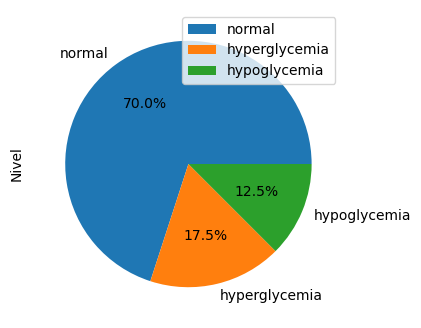

In [78]:
dfResult['Nivel'].value_counts().plot.pie(y='level_label',legend=True,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

### Eventos especiales

In [79]:
print('Paciente 1')
for evento in especialesP1:
    DateObj=evento
    print(DateObj)
    DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
    df_rango=dfP1.loc[DateObjStart:DateObj]

    dfGenResp,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df_rango,features,[ID_Paciente1],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,False)
    gen_XP1=np.concatenate((gen_XP1,array_Xtest))
    gen_YP1=np.concatenate((gen_YP1,array_Ytest))

print('Paciente 3')
for evento in especialesP3: 
    DateObj=evento
    print(DateObj)
    DateObjStart=utils.restarMinutos(DateObj,formato,min*lag)
    df_rango=dfP3.loc[DateObjStart:DateObj]

    dfGenResp,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(df_rango,features,[ID_Paciente3],min,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,False)
    gen_XP3=np.concatenate((gen_XP3,array_Xtest))
    gen_YP3=np.concatenate((gen_YP3,array_Ytest))
    

Paciente 1
2020-10-01 21:30:00
2020-10-03 10:30:00
2020-10-03 21:00:00
2020-10-10 19:45:00
2020-10-12 06:30:00
Paciente 3
2020-09-29 14:30:00
2020-10-11 14:00:00
2020-10-13 14:15:00
2020-10-14 08:45:00


In [80]:
dfResult=pd.DataFrame(scalerGlucosa.inverse_transform(gen_Y),columns=['Glucose level'])
dfResult['Nivel'] = dfResult['Glucose level'].apply(utils.label_LevelBG)   
dfResult['Nivel'].value_counts()

normal           28
hyperglycemia     7
hypoglycemia      5
Name: Nivel, dtype: int64

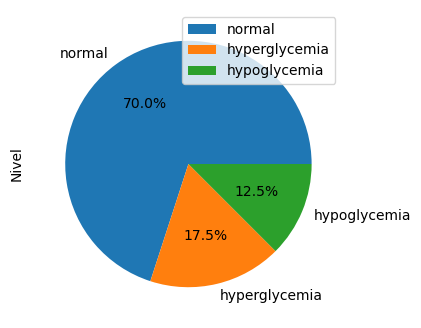

In [81]:
dfResult['Nivel'].value_counts().plot.pie(y='level_label',legend=True,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [114]:
with open('dataset/generado/paciente1/eventos_X.npy', 'wb') as f:
    np.save(f, gen_XP1)

In [112]:
with open('dataset/generado/paciente1/eventos_Y.npy', 'wb') as f:
    np.save(f, gen_YP1)

In [113]:
gen_XP1.shape

(25, 30, 5)

In [85]:
gen_YP1.shape

(25, 1)

In [86]:
with open('dataset/generado/paciente2/eventos_X.npy', 'wb') as f:
    np.save(f, gen_XP2)

In [87]:
with open('dataset/generado/paciente2/eventos_Y.npy', 'wb') as f:
    np.save(f, gen_YP2)

In [88]:
gen_XP2.shape

(0, 30, 5)

In [89]:
gen_YP2.shape

(0, 1)

In [90]:
with open('dataset/generado/paciente3/eventos_X.npy', 'wb') as f:
    np.save(f, gen_XP3)

In [91]:
with open('dataset/generado/paciente3/eventos_Y.npy', 'wb') as f:
    np.save(f, gen_YP3)

In [92]:
gen_XP3.shape

(24, 30, 5)

In [93]:
gen_YP3.shape

(24, 1)

# Generar DataSet de cada Paciente

In [94]:
train_share = 0.85
val_share = 0.95 

## Paciente 1

In [95]:
ID_Paciente1

'LIB193399'

In [96]:
dfPaciente1=utils.getDataPatient(dfGen,ID_Paciente1,strMin,True,True,resample=False)
dfPaciente1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1913 entries, 2020-09-30 18:15:00 to 2020-10-20 21:45:00
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Glucose level  1913 non-null   float64       
 1   ID             1913 non-null   object        
 2   Date           1913 non-null   datetime64[ns]
 3   level_label    1913 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 74.7+ KB


In [97]:
for evento in eventosP1:
    dfPaciente1=dfPaciente1.drop(pd.Timestamp(evento))
for evento in especialesP1:
    dfPaciente1=dfPaciente1.drop(pd.Timestamp(evento))
dfPaciente1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1888 entries, 2020-09-30 18:15:00 to 2020-10-20 21:45:00
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Glucose level  1888 non-null   float64       
 1   ID             1888 non-null   object        
 2   Date           1888 non-null   datetime64[ns]
 3   level_label    1888 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 73.8+ KB


In [98]:
dfP1Return,array_Xtrain,array_Ytrain,array_Xval,array_Yval,array_Xtest,array_Ytest=model_utils.GenDataSet(dfPaciente1,features,[ID_Paciente1],15,train_share,val_share,lag,n_ahead,scalerHours,scalerMin,scalerGlucosa,scalerPodId,scalerLevelId,fillNullData=True,resample=True)

In [110]:
with open('dataset/generado/paciente1/array_Xtrain.npy', 'wb') as f:
    np.save(f, array_Xtrain)
len(array_Ytrain)

1619

In [100]:
with open('dataset/generado/paciente1/array_Ytrain.npy', 'wb') as f:
    np.save(f, array_Ytrain)
len(array_Ytrain)

1619

In [101]:
with open('dataset/generado/paciente1/array_Xval.npy', 'wb') as f:
    np.save(f, array_Xval)
len(array_Xval)

190

In [102]:
with open('dataset/generado/paciente1/array_Yval.npy', 'wb') as f:
    np.save(f, array_Yval)
len(array_Yval)

190

In [103]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'wb') as f:
    np.save(f, array_Xtest)
len(array_Xtest)

96

In [104]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'wb') as f:
    np.save(f, array_Ytest)
len(array_Ytest)

96

In [105]:
dfP1Return.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1935 entries, 2020-09-30 18:15:00 to 2020-10-20 21:45:00
Freq: 15T
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose level  1935 non-null   float64
 1   hour           1935 non-null   float64
 2   min            1935 non-null   float64
 3   pod_id         1935 non-null   float64
 4   level_id       1935 non-null   float64
dtypes: float64(5)
memory usage: 90.7 KB


In [106]:
array_Xtest[50]

array([[0.38913043, 0.13043478, 0.        , 1.        , 1.        ],
       [0.39565217, 0.13043478, 0.25423729, 1.        , 1.        ],
       [0.40217391, 0.13043478, 0.50847458, 1.        , 1.        ],
       [0.41521739, 0.13043478, 0.76271186, 1.        , 1.        ],
       [0.44782609, 0.17391304, 0.        , 1.        , 1.        ],
       [0.48478261, 0.17391304, 0.25423729, 1.        , 1.        ],
       [0.48695652, 0.17391304, 0.50847458, 1.        , 1.        ],
       [0.47608696, 0.17391304, 0.76271186, 1.        , 1.        ],
       [0.47173913, 0.2173913 , 0.        , 0.        , 1.        ],
       [0.47391304, 0.2173913 , 0.25423729, 0.        , 1.        ],
       [0.47826087, 0.2173913 , 0.50847458, 0.        , 1.        ],
       [0.4673913 , 0.2173913 , 0.76271186, 0.        , 1.        ],
       [0.45652174, 0.26086957, 0.        , 0.        , 1.        ],
       [0.44347826, 0.26086957, 0.25423729, 0.        , 0.5       ],
       [0.43043478, 0.26086957, 0.

In [107]:
dfP1Return.loc[eventosP1[0]]

Glucose level    0.123913
hour             0.173913
min              0.000000
pod_id           1.000000
level_id         0.500000
Name: 2020-10-01 04:00:00, dtype: float64

In [108]:
utils.transformScaler(dfP1.loc[eventosP1[0]]['Glucose level'],scalerGlucosa)

0.13043478260869565